In [1]:
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt

In [2]:
# Carrega arquivos
location = '../spiders/spi/files/'
data = {}

for file in os.listdir(location):
    x=file.split('.')[1]
    with open(location + file, 'rb') as dado_salvo:
        print(dado_salvo)
        data[x] = pickle.load(dado_salvo)

<_io.BufferedReader name='../spiders/spi/files/cepea.acucar.2020-12-19.p'>
<_io.BufferedReader name='../spiders/spi/files/cepea.boi-gordo.2020-12-19.p'>
<_io.BufferedReader name='../spiders/spi/files/cepea.cafe.2020-12-19.p'>
<_io.BufferedReader name='../spiders/spi/files/cepea.milho.2020-12-19.p'>
<_io.BufferedReader name='../spiders/spi/files/cepea.soja.2020-12-19.p'>


In [3]:
# Converte sistema numérico
def conversor(df, colunas:list):
    for coluna in colunas:
        try:
            df[coluna] = df[coluna].map(lambda x: float(x.replace(".","").replace(",",".")))
        except:
            pass
    return df

# Executa correções e regularização nos dados
dict_cols = {
    'À vista R$' : 'preco_real',
    'À vista US$': 'preco_dolar',
}

for key, df in data.items():
    # corrige valores
    conversor(df, df.columns.values)
    # regulariza colunas
    data[key] = df.rename(columns=dict_cols)

acucar


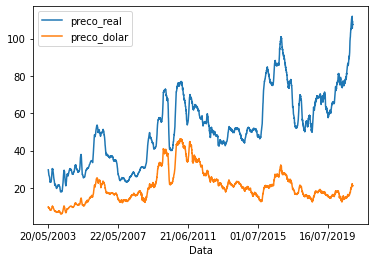

boi-gordo


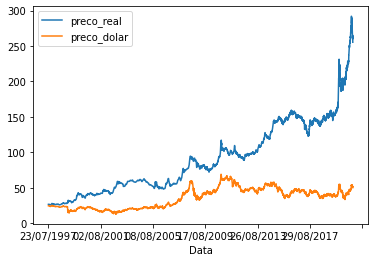

cafe


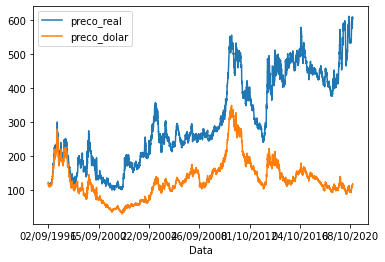

milho


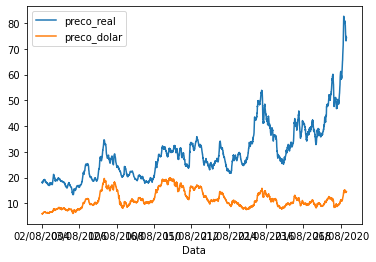

soja


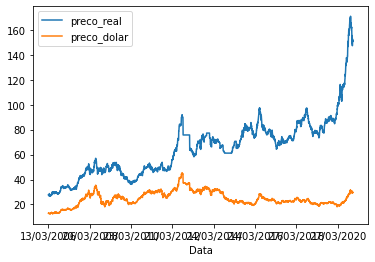

In [4]:
# visualiza os dados
for df in data.items():
    print(df[0])
    df[1].plot()
    plt.show()

In [5]:
# extrai os nomes dos dataframes
for df in data.items():
    locals()[df[0]] = df[1]

In [6]:
cafe = cafe.rename(columns=dict_cols)

In [9]:
cafe['dolar'] = cafe['preco_real']/cafe['preco_dolar']
cafe

,preco_real,preco_dolar,dolar
Data,,,
02/09/1996,123.09,121.15,1.016013
03/09/1996,119.68,117.69,1.016909
04/09/1996,119.39,117.44,1.016604
05/09/1996,118.42,116.38,1.017529
06/09/1996,118.09,115.98,1.018193
...,...,...,...
14/12/2020,600.37,117.49,5.109967
15/12/2020,596.64,117.24,5.089048
16/12/2020,608.32,118.67,5.126148


<AxesSubplot:xlabel='Data'>

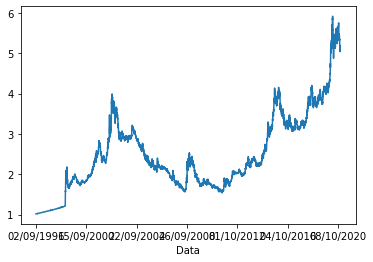

In [10]:
cafe['dolar'].plot()